In [1]:
# Set to false if you are not running
# this notebook in Google Colaboratory
run_on_colab = True

if(run_on_colab):
 from google.colab import drive
 # This will prompt for authorization.
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/'My Drive'/LSTM_MIDI/JAVIER/MIDI_Koh/NuevosDatos

/content/drive/My Drive/LSTM_MIDI/JAVIER/MIDI_Koh/NuevosDatos


In [3]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn import svm, linear_model, naive_bayes, neural_network, neighbors, ensemble
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
import random, math
import numpy as np
import scipy.sparse as sp
from datetime import datetime
from collections import Counter
from itertools import combinations
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from music21 import converter, instrument, note, chord, stream
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
import sys
from difflib import ndiff


In [4]:
with open('mxl-list.txt', 'r') as f:
    dataset = [piece.strip() for piece in f.readlines()]
    bach_data = [f for f in dataset if f.replace('-', '_').split('_')[0] == 'bach']
    beethoven_data = [f for f in dataset if f.replace('-', '_').split('_')[0] == 'beethoven']
    debussy_data = [f for f in dataset if f.replace('-', '_').split('_')[0] == 'debussy']
    scarlatti_data = [f for f in dataset if f.replace('-', '_').split('_')[0] == 'scarlatti']
    victoria_data = [f for f in dataset if f.replace('-', '_').split('_')[0] == 'victoria']

In [5]:
with open('bach-chordsequence.txt', 'r') as f:
    BACH = [' '.join(piece.strip('[]\n').split(', ')) for piece in f.readlines()]
    BACH = [(BACH[i], bach_data[i]) for i in range(len(BACH))]
with open('beethoven-chordsequence.txt', 'r') as f:
    BEETHOVEN = [' '.join(piece.strip('[]\n').split(', ')) for piece in f.readlines()]
    BEETHOVEN = [(BEETHOVEN[i], beethoven_data[i]) for i in range(len(BEETHOVEN))]
with open('debussy-chordsequence.txt', 'r') as f:
    DEBUSSY = [' '.join(piece.strip('[]\n').split(', ')) for piece in f.readlines()]
    DEBUSSY = [(DEBUSSY[i], debussy_data[i]) for i in range(len(DEBUSSY))]
with open('scarlatti-chordsequence.txt', 'r') as f:
    SCARLATTI = [' '.join(piece.strip('[]\n').split(', ')) for piece in f.readlines()]
    SCARLATTI = [(SCARLATTI[i], scarlatti_data[i]) for i in range(len(SCARLATTI))]
with open('victoria-chordsequence.txt', 'r') as f:
    VICTORIA = [' '.join(piece.strip('[]\n').split(', ')) for piece in f.readlines()]
    VICTORIA = [(VICTORIA[i], victoria_data[i]) for i in range(len(VICTORIA))]

In [6]:
Data = pd.DataFrame(columns = ['Author', 'piece', 'seq_number', 'MIDI'])
Test = pd.DataFrame(columns = ['Author', 'piece', 'seq_number', 'MIDI'])

In [7]:
seg_length = 100
for i in range(int(len(BACH)*0.8)):
  name = BACH[i][1];
  chords = np.array(list(map(int, BACH[i][0].split())))+1;
  rest = len(chords)%seg_length
  n_seq = int((len(chords)-rest)/seg_length)
  #author = "BACH";
  author = 1;
  for x in range(0,len(chords)-rest,100):
    segmentation = np.array(chords[x:x+100]);
    Data = Data.append({'Author' : author , 'piece' : name,'seq_number' : n_seq , 'MIDI' : segmentation}, ignore_index=True);
print('Finished with BACH');
for i in range(int(len(BEETHOVEN)*0.8)):
  name = BEETHOVEN[i][1];
  chords = np.array(list(map(int, BEETHOVEN[i][0].split())))+1;
  rest = len(chords)%seg_length
  n_seq = int((len(chords)-rest)/seg_length)
  #author = "BEETHOVEN";
  author = 2;
  for x in range(0,len(chords)-rest,100):
    segmentation = np.array(chords[x:x+100]);
    Data = Data.append({'Author' : author , 'piece' : name,'seq_number' : n_seq , 'MIDI' : segmentation}, ignore_index=True);
print('Finished with BEETHOVEN');
for i in range(int(len(DEBUSSY)*0.8)):
  name = DEBUSSY[i][1];
  chords = np.array(list(map(int, DEBUSSY[i][0].split())))+1;
  rest = len(chords)%seg_length
  n_seq = int((len(chords)-rest)/seg_length)
  #author = "DEBUSSY";
  author = 3;
  for x in range(0,len(chords)-rest,100):
    segmentation = np.array(chords[x:x+100]);
    Data = Data.append({'Author' : author , 'piece' : name,'seq_number' : n_seq , 'MIDI' : segmentation}, ignore_index=True);
print('Finished with DEBUSSY');
for i in range(int(len(SCARLATTI)*0.8)):
  name = SCARLATTI[i][1];
  chords = np.array(list(map(int, SCARLATTI[i][0].split())))+1;
  rest = len(chords)%seg_length
  n_seq = int((len(chords)-rest)/seg_length)
  #author = "SCARLATTI";
  author = 4;
  for x in range(0,len(chords)-rest,100):
    segmentation = np.array(chords[x:x+100]);
    Data = Data.append({'Author' : author , 'piece' : name,'seq_number' : n_seq , 'MIDI' : segmentation}, ignore_index=True);
print('Finished with SCARLATTI');
for i in range(int(len(VICTORIA)*0.8)):
  name = VICTORIA[i][1];
  chords = np.array(list(map(int, VICTORIA[i][0].split())))+1;
  rest = len(chords)%seg_length
  n_seq = int((len(chords)-rest)/seg_length)
  #author = "VICTORIA";
  author = 5;
  for x in range(0,len(chords)-rest,100):
    segmentation = np.array(chords[x:x+100]);
    Data = Data.append({'Author' : author , 'piece' : name,'seq_number' : n_seq , 'MIDI' : segmentation}, ignore_index=True);
print('Finished with VICTORIA');
Data


Finished with BACH
Finished with BEETHOVEN
Finished with DEBUSSY
Finished with SCARLATTI
Finished with VICTORIA


,Author,piece,seq_number,MIDI
0,1,bach_aria_suite_3_1068_2_(c)tadokoro.xml,4,"[1, 1, 1, 1, 89, 89, 89, 89, 70, 146, 146, 146..."
1,1,bach_aria_suite_3_1068_2_(c)tadokoro.xml,4,"[89, 89, 89, 89, 70, 146, 146, 146, 6, 6, 6, 6..."
2,1,bach_aria_suite_3_1068_2_(c)tadokoro.xml,4,"[21, 119, 128, 14, 75, 128, 128, 61, 45, 89, 9..."
3,1,bach_aria_suite_3_1068_2_(c)tadokoro.xml,4,"[125, 27, 31, 79, 78, 72, 31, 26, 157, 41, 45,..."
4,1,bach_art_of_fugue_1080_1_(c)harfesoft.xml,47,"[0, 0, 0, 0, 145, 145, 145, 65, 68, 1, 4, 145,..."
...,...,...,...,...
11458,5,victoria-da_salmos-de-visperas_08-beatus_vir_(...,2,"[0, 113, 35, 146, 1, 1, 1, 1, 1, 1, 115, 33, 1..."
11459,5,victoria-da_salmos-de-visperas_08-beatus_vir_(...,2,"[13, 74, 66, 66, 66, 160, 89, 160, 126, 48, 89..."
11460,5,victoria-da_salmos-de-visperas_09-nisi_dominus...,1,"[1, 1, 1, 1, 115, 149, 13, 68, 68, 1, 1, 1, 6,..."
11461,5,victoria-da_salmos-de-visperas_10-credidi_(c)a...,2,"[1, 1, 1, 1, 115, 149, 13, 68, 66, 53, 53, 3, ..."


In [8]:

for i in range(int(len(BACH)*0.8)+1,len(BACH)):
  name = BACH[i][1];
  chords = np.array(list(map(int, BACH[i][0].split())))+1;
  rest = len(chords)%seg_length
  n_seq = int((len(chords)-rest)/seg_length)
  #author = "BACH";
  author = 1;
  for x in range(0,len(chords)-rest,100):
    segmentation = np.array(chords[x:x+100]);
    Test = Test.append({'Author' : author , 'piece' : name,'seq_number' : n_seq , 'MIDI' : segmentation}, ignore_index=True);
print('Finished with BACH');
for i in range(int(len(BEETHOVEN)*0.8)+1,len(BEETHOVEN)):
  name = BEETHOVEN[i][1];
  chords = np.array(list(map(int, BEETHOVEN[i][0].split())))+1;
  rest = len(chords)%seg_length
  n_seq = int((len(chords)-rest)/seg_length)
  #author = "BEETHOVEN";
  author = 2;
  for x in range(0,len(chords)-rest,100):
    segmentation = np.array(chords[x:x+100]);
    Test = Test.append({'Author' : author , 'piece' : name,'seq_number' : n_seq , 'MIDI' : segmentation}, ignore_index=True);
print('Finished with BEETHOVEN');
for i in range(int(len(DEBUSSY)*0.8)+1,len(DEBUSSY)):
  name = DEBUSSY[i][1];
  chords = np.array(list(map(int, DEBUSSY[i][0].split())))+1;
  rest = len(chords)%seg_length
  n_seq = int((len(chords)-rest)/seg_length)
  #author = "DEBUSSY";
  author = 3;
  for x in range(0,len(chords)-rest,100):
    segmentation = np.array(chords[x:x+100]);
    Test = Test.append({'Author' : author , 'piece' : name,'seq_number' : n_seq , 'MIDI' : segmentation}, ignore_index=True);
print('Finished with DEBUSSY');
for i in range(int(len(SCARLATTI)*0.8)+1,len(SCARLATTI)):
  name = SCARLATTI[i][1];
  chords = np.array(list(map(int, SCARLATTI[i][0].split())))+1;
  rest = len(chords)%seg_length
  n_seq = int((len(chords)-rest)/seg_length)
  #author = "SCARLATTI";
  author = 4;
  for x in range(0,len(chords)-rest,100):
    segmentation = np.array(chords[x:x+100]);
    Test = Test.append({'Author' : author , 'piece' : name,'seq_number' : n_seq , 'MIDI' : segmentation}, ignore_index=True);
print('Finished with SCARLATTI');
for i in range(int(len(VICTORIA)*0.8)+1,len(VICTORIA)):
  name = VICTORIA[i][1];
  chords = np.array(list(map(int, VICTORIA[i][0].split())))+1;
  rest = len(chords)%seg_length
  n_seq = int((len(chords)-rest)/seg_length)
  #author = "VICTORIA";
  author = 5;
  for x in range(0,len(chords)-rest,100):
    segmentation = np.array(chords[x:x+100]);
    Test = Test.append({'Author' : author , 'piece' : name,'seq_number' : n_seq , 'MIDI' : segmentation}, ignore_index=True);
print('Finished with VICTORIA');
Test


Finished with BACH
Finished with BEETHOVEN
Finished with DEBUSSY
Finished with SCARLATTI
Finished with VICTORIA


,Author,piece,seq_number,MIDI
0,1,bach-js_well-tempered-clavier-ii_bwv-871_(c)pa...,3,"[147, 48, 13, 157, 13, 48, 13, 157, 93, 125, 7..."
1,1,bach-js_well-tempered-clavier-ii_bwv-871_(c)pa...,3,"[1, 93, 48, 93, 160, 93, 13, 13, 8, 45, 119, 1..."
2,1,bach-js_well-tempered-clavier-ii_bwv-871_(c)pa...,3,"[45, 48, 13, 79, 13, 13, 160, 48, 173, 173, 15..."
3,1,bach-js_well-tempered-clavier-ii_bwv-884_(c)si...,4,"[0, 0, 68, 13, 48, 48, 93, 48, 93, 93, 48, 48,..."
4,1,bach-js_well-tempered-clavier-ii_bwv-884_(c)si...,4,"[80, 13, 160, 14, 13, 160, 125, 13, 13, 125, 9..."
...,...,...,...,...
4042,5,victoria-de_missa_ascendens_christus_6_(c)icki...,1,"[145, 145, 145, 35, 35, 33, 34, 81, 89, 153, 1..."
4043,5,victoria-de_o_magnum_mysterium_(brass)_(c)icki...,2,"[97, 97, 97, 97, 177, 177, 177, 177, 177, 177,..."
4044,5,victoria-de_o_magnum_mysterium_(brass)_(c)icki...,2,"[33, 33, 112, 69, 93, 121, 107, 150, 45, 74, 1..."
4045,5,victoria-de_tu_es_petrus_(c)icking-archive.mxl,2,"[113, 113, 1, 65, 1, 113, 35, 145, 147, 113, 1..."


In [9]:
Data

,Author,piece,seq_number,MIDI
0,1,bach_aria_suite_3_1068_2_(c)tadokoro.xml,4,"[1, 1, 1, 1, 89, 89, 89, 89, 70, 146, 146, 146..."
1,1,bach_aria_suite_3_1068_2_(c)tadokoro.xml,4,"[89, 89, 89, 89, 70, 146, 146, 146, 6, 6, 6, 6..."
2,1,bach_aria_suite_3_1068_2_(c)tadokoro.xml,4,"[21, 119, 128, 14, 75, 128, 128, 61, 45, 89, 9..."
3,1,bach_aria_suite_3_1068_2_(c)tadokoro.xml,4,"[125, 27, 31, 79, 78, 72, 31, 26, 157, 41, 45,..."
4,1,bach_art_of_fugue_1080_1_(c)harfesoft.xml,47,"[0, 0, 0, 0, 145, 145, 145, 65, 68, 1, 4, 145,..."
...,...,...,...,...
11458,5,victoria-da_salmos-de-visperas_08-beatus_vir_(...,2,"[0, 113, 35, 146, 1, 1, 1, 1, 1, 1, 115, 33, 1..."
11459,5,victoria-da_salmos-de-visperas_08-beatus_vir_(...,2,"[13, 74, 66, 66, 66, 160, 89, 160, 126, 48, 89..."
11460,5,victoria-da_salmos-de-visperas_09-nisi_dominus...,1,"[1, 1, 1, 1, 115, 149, 13, 68, 68, 1, 1, 1, 6,..."
11461,5,victoria-da_salmos-de-visperas_10-credidi_(c)a...,2,"[1, 1, 1, 1, 115, 149, 13, 68, 66, 53, 53, 3, ..."


# Luis:

* ## x_train y x_test tienen que tener numpy arrays con las secuencias shape (num sec , 100, 1) para input de la LSTM
* ## y las de train hay que ALEATORIZARLAS para no pasarle segidas las secuencias de un mismo autor y pieza musical

* # x_train and x_test will be sequences on integers from 0 to 192 (193 values !!! for the Embedding layer)

* # one hot encode the output variable :y_train_ohe = np_utils.to_categorical(y_train)



In [10]:
x_train = np.vstack(Data[['MIDI']].MIDI)
y_train = np.array(Data['Author'])

x_test = np.vstack(Test[['MIDI']].MIDI)
y_test = np.array(Test['Author'])

# shuffle training data and labels
idx = np.random.permutation(len(y_train))
x_train,y_train = x_train[idx], y_train[idx]


# one hot encode the output variable
y_train_ohe = np_utils.to_categorical(y_train -1 )
y_test_ohe = np_utils.to_categorical(y_test -1 )

print('Training data shape', x_train.shape)
print('Training OHE labels shape', y_train_ohe.shape)

print('\nTest data shape', x_test.shape)

Training data shape (11463, 100)
Training OHE labels shape (11463, 5)

Test data shape (4047, 100)


In [11]:
x_train[0]

array([ 74,  48,  48,  48,  48,  48,  93,  13,  13,   9,   1,   1,  48,
        48,  48,  48,  48,  48,  93,  13,  13,   9,   1,   1, 118,  48,
       157, 173, 157, 153,  13,  48, 157, 173, 157, 112,  93, 125, 121,
       191, 160,  93, 160, 125, 121, 125, 125, 125, 125,   9, 101,  46,
       125,  40, 125, 125, 125,  61,  10, 141,  16, 141,   6, 173,  57,
         2,  16,  16, 141,  16, 141, 154,  94,  30,  10,  47,  34,   7,
       155,  34,   7, 155,  34,   7, 155,  61, 114,   2, 149, 121,  61,
       149, 101, 155,  34,   7, 155,  34,   7, 155])

## <font color=red>CAPA DE EMBEDDINGS + Average Pooling (sin LSTM!)

* **Entiende lo que hace: GlobalAveragePooling1D**

In [12]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, GlobalAveragePooling1D, Embedding

def create_network(network_input, n_classes):
    """ create the structure of the neural network """

    model = Sequential()

    model.add(Embedding(193, 4, input_length=100))
    # After the Embedding layer, 
    # our activations have shape `(samples, input_length, 4)`.

    # We can flatten  (input_length=20, 8) into (input_length * 4)
    # Or to apply GlobalAveragePooling1D() to get the
    # average of 20 8-dimensional embeddings = 8-dim average

    #model.add(Flatten())
    model.add(GlobalAveragePooling1D())

    # We add the classifier on top
    model.add(Dense(n_classes, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

    return model



In [13]:
model = create_network(x_train,5)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 4)            772       
_________________________________________________________________
global_average_pooling1d (Gl (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 5)                 25        
Total params: 797
Trainable params: 797
Non-trainable params: 0
_________________________________________________________________


In [14]:
filepath = "/content/drive/My Drive/LSTM_MIDI/JAVIER/MIDI_Koh/NuevosDatos/{epoch:02d}-{loss:.4f}.h5"

checkpoint = ModelCheckpoint(filepath, monitor='loss',verbose=0,
                             save_best_only=True,mode='min')

callbacks_list = [checkpoint]


In [15]:
## Analisis del diccionario history
history = model.fit(x_train, y_train_ohe, epochs=50, batch_size=64, validation_split = 0.2 ,
                    callbacks=callbacks_list)

Epoch 1/50
144/144 [==============================] - 1s 6ms/step - loss: 1.5582 - accuracy: 0.4100 - val_loss: 1.5091 - val_accuracy: 0.3934
Epoch 2/50
144/144 [==============================] - 1s 5ms/step - loss: 1.4492 - accuracy: 0.4097 - val_loss: 1.4029 - val_accuracy: 0.3929
Epoch 3/50
144/144 [==============================] - 1s 5ms/step - loss: 1.3483 - accuracy: 0.4094 - val_loss: 1.3228 - val_accuracy: 0.3925
Epoch 4/50
144/144 [==============================] - 1s 5ms/step - loss: 1.2835 - accuracy: 0.4093 - val_loss: 1.2806 - val_accuracy: 0.3938
Epoch 5/50
144/144 [==============================] - 1s 5ms/step - loss: 1.2509 - accuracy: 0.4133 - val_loss: 1.2597 - val_accuracy: 0.4021
Epoch 6/50
144/144 [==============================] - 1s 5ms/step - loss: 1.2312 - accuracy: 0.4297 - val_loss: 1.2426 - val_accuracy: 0.4200
Epoch 7/50
144/144 [==============================] - 1s 5ms/step - loss: 1.2130 - accuracy: 0.4586 - val_loss: 1.2243 - val_accuracy: 0.4509
Epoch 

In [16]:
# Check accuracy on train set

loss, accuracy = model.evaluate(x_train, y_train_ohe, batch_size=128)


print('\nTraining Accuracy=', accuracy)

90/90 [==============================] - 0s 3ms/step - loss: 0.4861 - accuracy: 0.8206

Training Accuracy= 0.8206403255462646


In [17]:
# Check accuracy on test set

loss, accuracy = model.evaluate(x_test, y_test_ohe, batch_size=128)


print('\nTest Accuracy=', accuracy)

32/32 [==============================] - 0s 3ms/step - loss: 0.4800 - accuracy: 0.8409

Test Accuracy= 0.8408697843551636


Train Accuracy (blue):  0.82
Test_Accuracy (red):  0.81


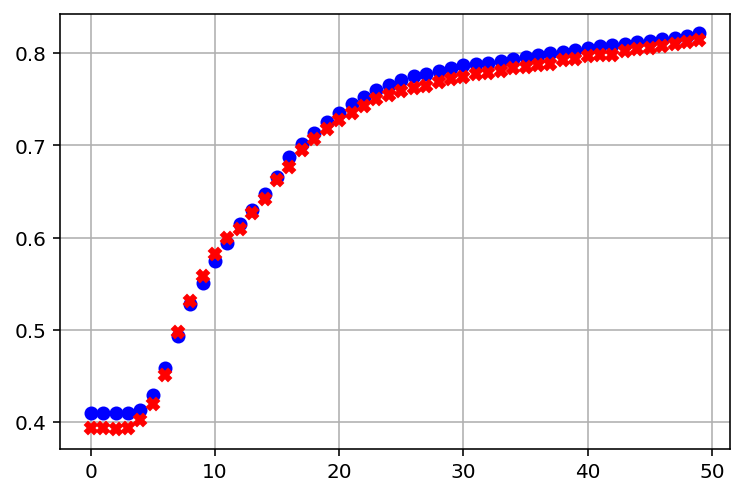

In [18]:
import matplotlib.pyplot as plt

%matplotlib inline

print('Train Accuracy (blue): ',np.round(history.history['accuracy'][-1],2))
print('Test_Accuracy (red): ',np.round(history.history['val_accuracy'][-1],2))

# Plot the accuracy curves
plt.plot(history.history['accuracy'],'bo')
plt.plot(history.history['val_accuracy'],'rX')
plt.grid()

In [19]:
pred_probabilities= model.predict(x_test)

print('First Five Probs.:\n',pred_probabilities[0:5])

print('\n\nFirst Five Classes:\n',y_test_ohe[0:5])

First Five Probs.:
 [[7.75800943e-02 4.84076981e-03 5.60711022e-04 5.13894542e-04
  1.20672084e-04]
 [4.70606387e-01 3.87159875e-03 1.32286432e-03 6.49932912e-03
  5.40047004e-05]
 [1.93391472e-01 7.46601261e-03 1.61847740e-03 3.12534929e-03
  4.61596464e-05]
 [3.89259234e-02 6.91436697e-03 3.33768112e-04 4.27417643e-03
  1.74939781e-02]
 [9.88157168e-02 4.60472237e-03 2.72746343e-04 2.47153314e-03
  3.95574811e-04]]


First Five Classes:
 [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


## Confusion Matrix

Confusion Matrix:
 [[1720   63    0    3    3]
 [ 134 1418   32   14   20]
 [  43   91   41    2    4]
 [  45  157    1   54    1]
 [   7   22    1    1  170]]


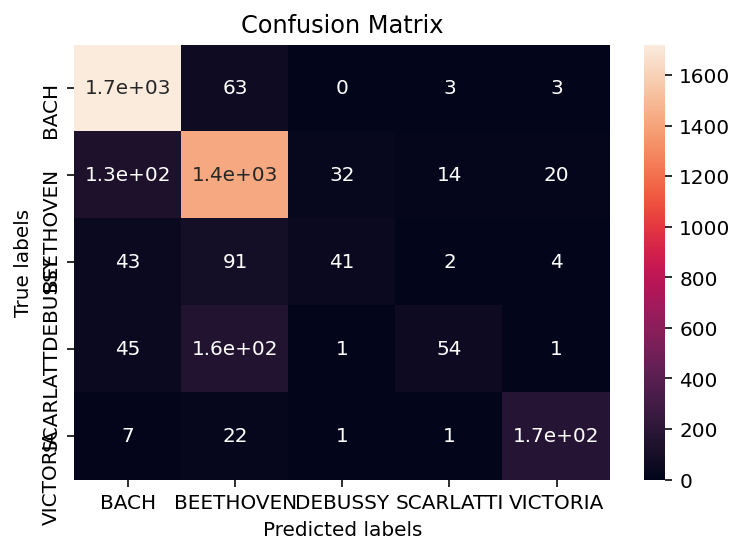

In [20]:
import seaborn as sns

from sklearn.metrics import confusion_matrix as cm

ConfMatrix=cm(np.argmax(y_test_ohe,1), np.argmax(pred_probabilities,1))

print('Confusion Matrix:\n',ConfMatrix)

ax= plt.subplot()
sns.heatmap(ConfMatrix, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['BACH', 'BEETHOVEN','DEBUSSY','SCARLATTI','VICTORIA'])
ax.yaxis.set_ticklabels(['BACH', 'BEETHOVEN','DEBUSSY','SCARLATTI','VICTORIA']);
